In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/nyc_taxi_trip_duration.csv


# new york taxi trip duration exploration

In [3]:
# reading the data file of csv
taxi_df = pd.read_csv("/kaggle/input/nyc-taxi-trip-duration/nyc_taxi_trip_duration.csv")
taxi_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


# There are  `729322` rows in  dataframe with  `11 columns`

In [4]:
new_df = taxi_df

In [5]:

# changing the datatypes and columns according to requirement
new_df['pickup_datetime'] = pd.to_datetime(new_df['pickup_datetime'])
new_df['dropoff_datetime'] = pd.to_datetime(new_df['dropoff_datetime'])

new_df['pickup_year'] = new_df['pickup_datetime'].dt.year
new_df['pickup_month'] = new_df['pickup_datetime'].dt.month
new_df['pickup_day'] = new_df['pickup_datetime'].dt.day
new_df['pickup_weekday'] = new_df['pickup_datetime'].dt.weekday
new_df['pickup_weekend'] = (new_df['pickup_day'] >= 5).astype(int)
new_df['pickup_hour'] = new_df['pickup_datetime'].dt.hour

new_df['dropoff_year'] = new_df['dropoff_datetime'].dt.year
new_df['dropoff_month'] = new_df['dropoff_datetime'].dt.month
new_df['dropoff_day'] = new_df['dropoff_datetime'].dt.day
new_df['dropoff_weekday'] = new_df['dropoff_datetime'].dt.weekday
new_df['dropoff_weekend'] = (new_df['dropoff_day'] >= 5).astype(int)
new_df['dropoff_hour'] = new_df['dropoff_datetime'].dt.hour
new_df['drop_hour'] = new_df['dropoff_datetime'].dt.hour

new_df = new_df.drop(['pickup_datetime', 'dropoff_datetime'], axis=1)

In [6]:
new_df

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,...,pickup_weekday,pickup_weekend,pickup_hour,dropoff_year,dropoff_month,dropoff_day,dropoff_weekday,dropoff_weekend,dropoff_hour,drop_hour
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016,...,0,1,16,2016,2,29,0,1,16,16
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2016,...,4,1,23,2016,3,11,4,1,23,23
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2016,...,6,1,17,2016,2,21,6,1,18,18
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2016,...,1,1,9,2016,1,5,1,1,10,10
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2016,...,2,1,6,2016,2,17,2,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2,-73.965919,40.789780,-73.952637,40.789181,N,296,2016,...,5,1,13,2016,5,21,5,1,13,13
729318,id0102861,1,1,-73.996666,40.737434,-74.001320,40.731911,N,315,2016,...,0,1,0,2016,2,22,0,1,0,0
729319,id0439699,1,1,-73.997849,40.761696,-74.001488,40.741207,N,673,2016,...,4,1,18,2016,4,15,4,1,19,19
729320,id2078912,1,1,-74.006706,40.708244,-74.013550,40.713814,N,447,2016,...,6,1,9,2016,6,19,6,1,9,9


In [7]:
# checking the dataframe 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   passenger_count     729322 non-null  int64  
 3   pickup_longitude    729322 non-null  float64
 4   pickup_latitude     729322 non-null  float64
 5   dropoff_longitude   729322 non-null  float64
 6   dropoff_latitude    729322 non-null  float64
 7   store_and_fwd_flag  729322 non-null  object 
 8   trip_duration       729322 non-null  int64  
 9   pickup_year         729322 non-null  int32  
 10  pickup_month        729322 non-null  int32  
 11  pickup_day          729322 non-null  int32  
 12  pickup_weekday      729322 non-null  int32  
 13  pickup_weekend      729322 non-null  int64  
 14  pickup_hour         729322 non-null  int32  
 15  dropoff_year        729322 non-nul

# There are missing values in data frame

In [8]:
#checking the null valus
new_df.isna().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_year           0
pickup_month          0
pickup_day            0
pickup_weekday        0
pickup_weekend        0
pickup_hour           0
dropoff_year          0
dropoff_month         0
dropoff_day           0
dropoff_weekday       0
dropoff_weekend       0
dropoff_hour          0
drop_hour             0
dtype: int64

# No null values

In [9]:
# checking the duplicate values
new_df.duplicated().sum()

0

# No duplicate values

In [10]:
# checking the columns in data
new_df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_weekday', 'pickup_weekend', 'pickup_hour',
       'dropoff_year', 'dropoff_month', 'dropoff_day', 'dropoff_weekday',
       'dropoff_weekend', 'dropoff_hour', 'drop_hour'],
      dtype='object')

In [11]:
new_df.dtypes

id                     object
vendor_id               int64
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
pickup_year             int32
pickup_month            int32
pickup_day              int32
pickup_weekday          int32
pickup_weekend          int64
pickup_hour             int32
dropoff_year            int32
dropoff_month           int32
dropoff_day             int32
dropoff_weekday         int32
dropoff_weekend         int64
dropoff_hour            int32
drop_hour               int32
dtype: object

In [12]:
# how many columns
len(new_df.columns)

22

In [13]:
# statistical informatiom of the dataframe
new_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_year,pickup_month,pickup_day,pickup_weekday,pickup_weekend,pickup_hour,dropoff_year,dropoff_month,dropoff_day,dropoff_weekday,dropoff_weekend,dropoff_hour,drop_hour
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.0,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.0,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000,729322.00000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,2016.0,3.518410,15.502088,3.049081,0.868360,13.611698,2016.0,3.518764,15.502587,3.053015,0.868453,13.60616,13.60616
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,0.0,1.680661,8.699772,1.954470,0.338099,6.402853,0.0,1.680815,8.699714,1.956866,0.337998,6.48637,6.48637
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,0.000000,0.000000,0.00000,0.00000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,2016.0,2.000000,8.000000,1.000000,1.000000,9.000000,2016.0,2.000000,8.000000,1.000000,1.000000,9.00000,9.00000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,2016.0,4.000000,15.000000,3.000000,1.000000,14.000000,2016.0,4.000000,15.000000,3.000000,1.000000,14.00000,14.00000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,2016.0,5.000000,23.000000,5.000000,1.000000,19.000000,2016.0,5.000000,23.000000,5.000000,1.000000,19.00000,19.00000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,2016.0,6.000000,31.000000,6.000000,1.000000,23.000000,2016.0,7.000000,31.000000,6.000000,1.000000,23.00000,23.00000


## Exploratory data analysis of the new york city taxi trip duration

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   passenger_count     729322 non-null  int64  
 3   pickup_longitude    729322 non-null  float64
 4   pickup_latitude     729322 non-null  float64
 5   dropoff_longitude   729322 non-null  float64
 6   dropoff_latitude    729322 non-null  float64
 7   store_and_fwd_flag  729322 non-null  object 
 8   trip_duration       729322 non-null  int64  
 9   pickup_year         729322 non-null  int32  
 10  pickup_month        729322 non-null  int32  
 11  pickup_day          729322 non-null  int32  
 12  pickup_weekday      729322 non-null  int32  
 13  pickup_weekend      729322 non-null  int64  
 14  pickup_hour         729322 non-null  int32  
 15  dropoff_year        729322 non-nul

In [15]:
num_col = new_df.iloc[:,8:]

In [16]:
num_col

,trip_duration,pickup_year,pickup_month,pickup_day,pickup_weekday,pickup_weekend,pickup_hour,dropoff_year,dropoff_month,dropoff_day,dropoff_weekday,dropoff_weekend,dropoff_hour,drop_hour
0,400,2016,2,29,0,1,16,2016,2,29,0,1,16,16
1,1100,2016,3,11,4,1,23,2016,3,11,4,1,23,23
2,1635,2016,2,21,6,1,17,2016,2,21,6,1,18,18
3,1141,2016,1,5,1,1,9,2016,1,5,1,1,10,10
4,848,2016,2,17,2,1,6,2016,2,17,2,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,296,2016,5,21,5,1,13,2016,5,21,5,1,13,13
729318,315,2016,2,22,0,1,0,2016,2,22,0,1,0,0
729319,673,2016,4,15,4,1,18,2016,4,15,4,1,19,19
729320,447,2016,6,19,6,1,9,2016,6,19,6,1,9,9


In [17]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
new_df["trip_duration"].value_counts()[:20]

trip_duration
348    830
368    808
363    808
388    805
358    798
404    793
337    791
376    788
354    787
307    787
332    786
372    785
370    784
487    784
317    783
418    782
334    782
423    781
417    780
398    780
Name: count, dtype: int64

In [19]:
new_df["trip_duration"].value_counts()

trip_duration
348      830
368      808
363      808
388      805
358      798
        ... 
85772      1
84339      1
86254      1
5136       1
84188      1
Name: count, Length: 6296, dtype: int64

In [20]:
def uni_variate_visualization(df):
    for i in df.columns:
        print("*"*30,i)
        
        print("boxplot of ",i)
        sns.boxplot(df[i])
        
        
        
        plt.title(f"boxplot of {i}")
        plt.show()
        
        print("density plot of",i)
        
        print("*"*30,i)
        
        sns.kdeplot(df[i])
        plt.title(f"density plot of {i}")
        plt.show()
        
        print("density plot of",i)
        
        print("*"*30,i)
        
        df[i].plot(kind="hist")
       # plt.hist(df[i])
        plt.title(f"histogram of{i}")
        plt.show()
        
        
        info_col=df[i].describe()
        print(info_col)
        

****************************** trip_duration
boxplot of  trip_duration


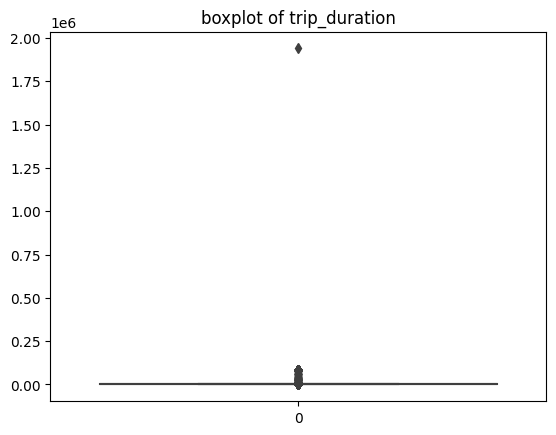

density plot of trip_duration
****************************** trip_duration


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


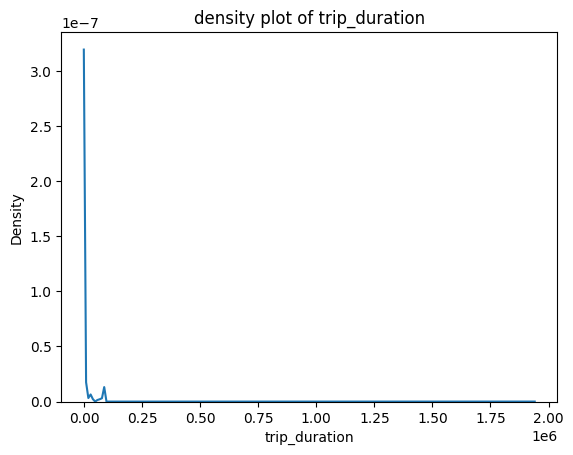

density plot of trip_duration
****************************** trip_duration


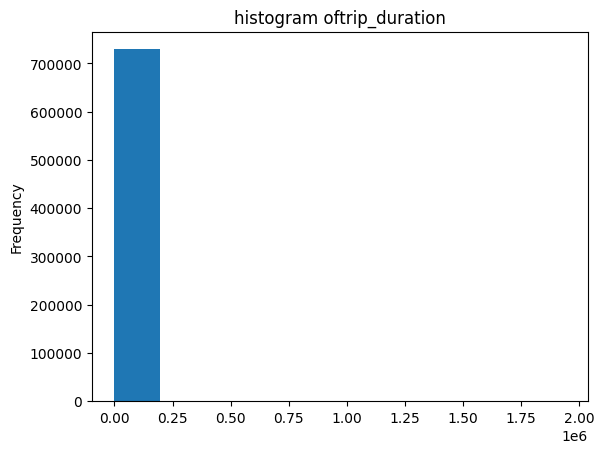

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64
****************************** pickup_year
boxplot of  pickup_year


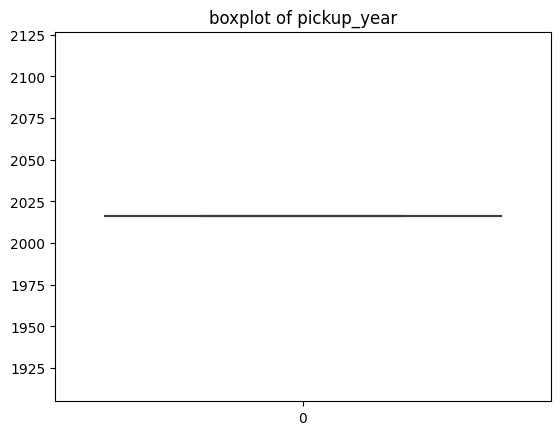

density plot of pickup_year
****************************** pickup_year


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_26/1389779063.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[i])


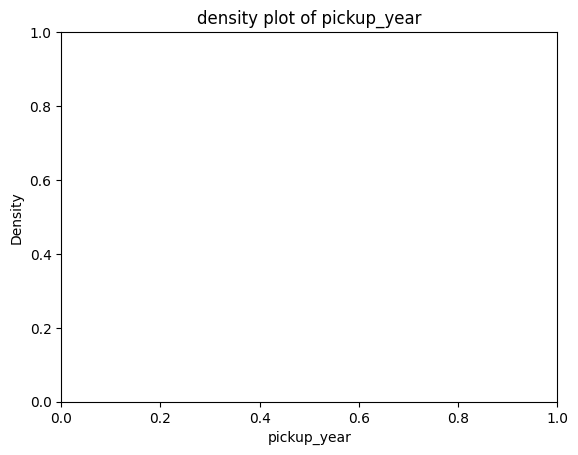

density plot of pickup_year
****************************** pickup_year


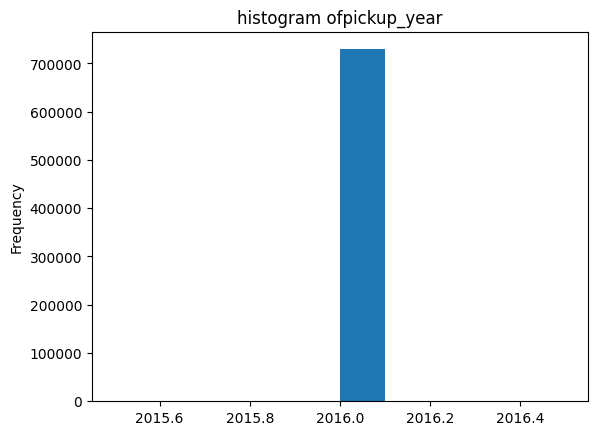

count    729322.0
mean       2016.0
std           0.0
min        2016.0
25%        2016.0
50%        2016.0
75%        2016.0
max        2016.0
Name: pickup_year, dtype: float64
****************************** pickup_month
boxplot of  pickup_month


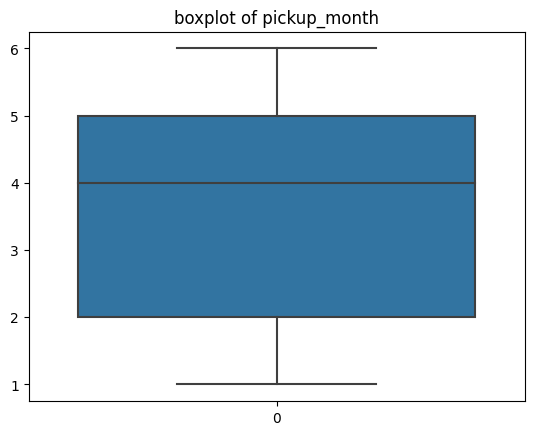

density plot of pickup_month
****************************** pickup_month


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


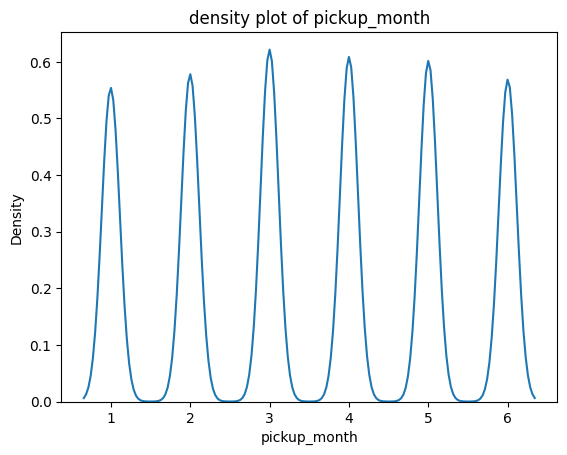

density plot of pickup_month
****************************** pickup_month


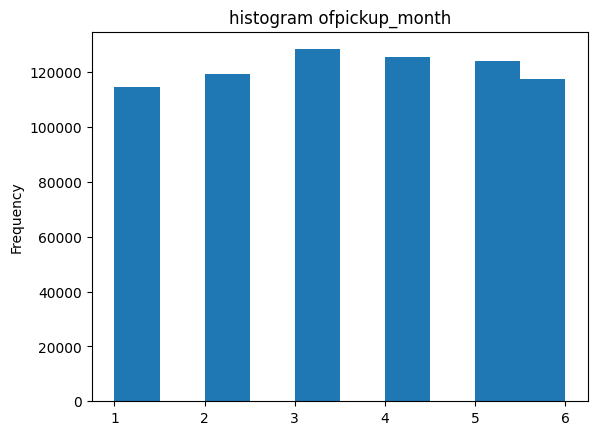

count    729322.000000
mean          3.518410
std           1.680661
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           6.000000
Name: pickup_month, dtype: float64
****************************** pickup_day
boxplot of  pickup_day


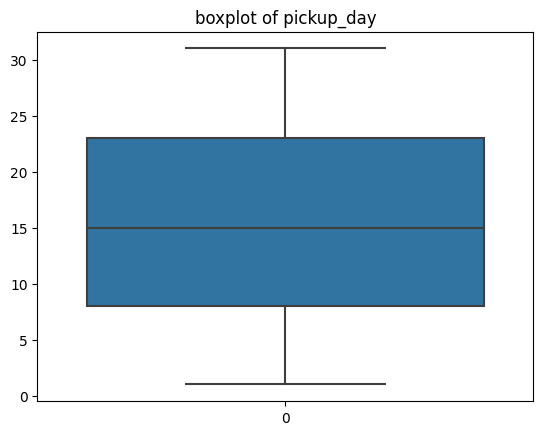

density plot of pickup_day
****************************** pickup_day


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


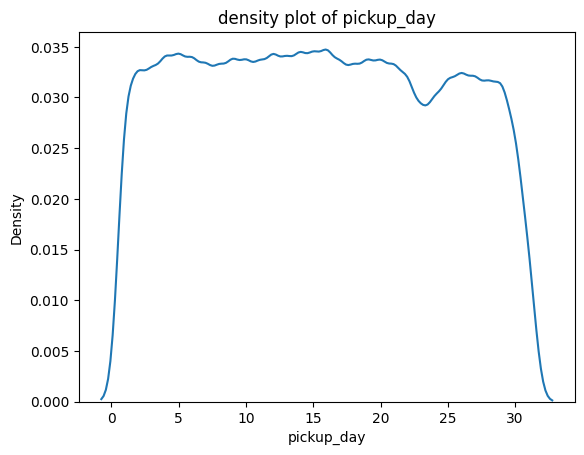

density plot of pickup_day
****************************** pickup_day


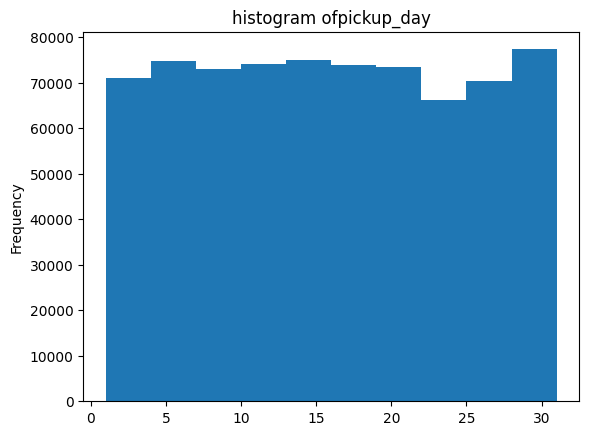

count    729322.000000
mean         15.502088
std           8.699772
min           1.000000
25%           8.000000
50%          15.000000
75%          23.000000
max          31.000000
Name: pickup_day, dtype: float64
****************************** pickup_weekday
boxplot of  pickup_weekday


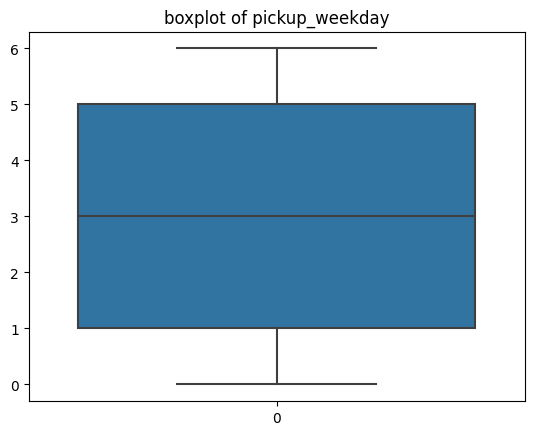

density plot of pickup_weekday
****************************** pickup_weekday


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


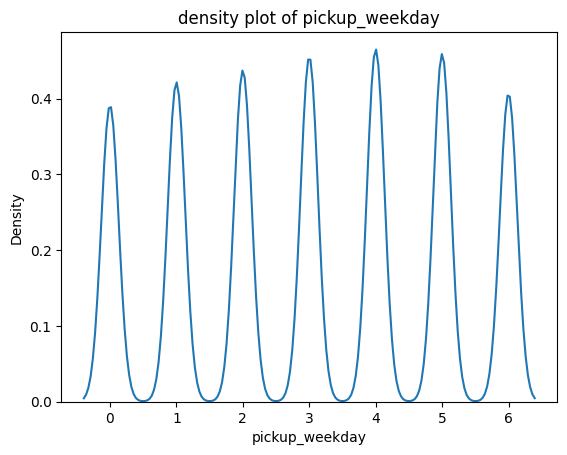

density plot of pickup_weekday
****************************** pickup_weekday


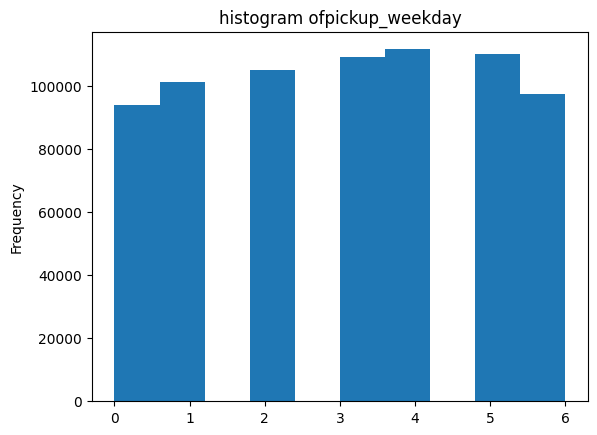

count    729322.000000
mean          3.049081
std           1.954470
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: pickup_weekday, dtype: float64
****************************** pickup_weekend
boxplot of  pickup_weekend


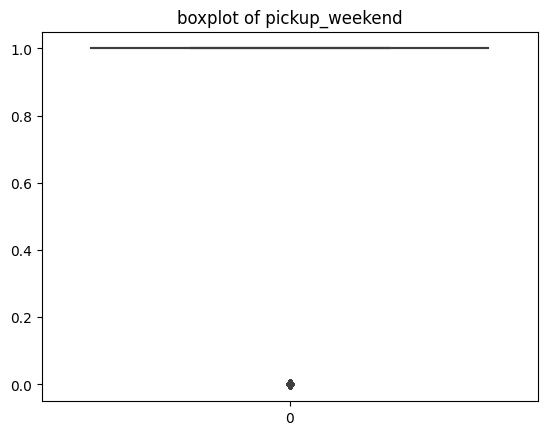

density plot of pickup_weekend
****************************** pickup_weekend


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


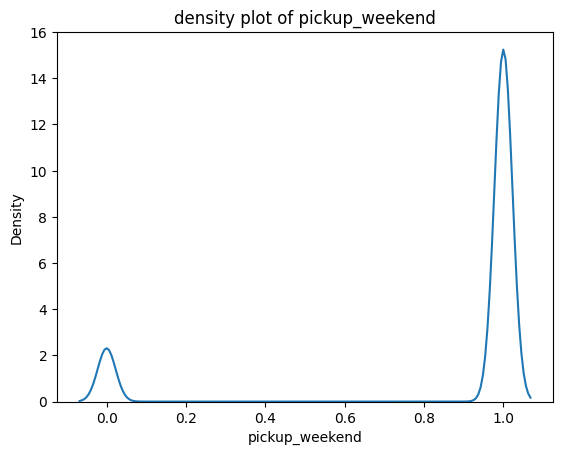

density plot of pickup_weekend
****************************** pickup_weekend


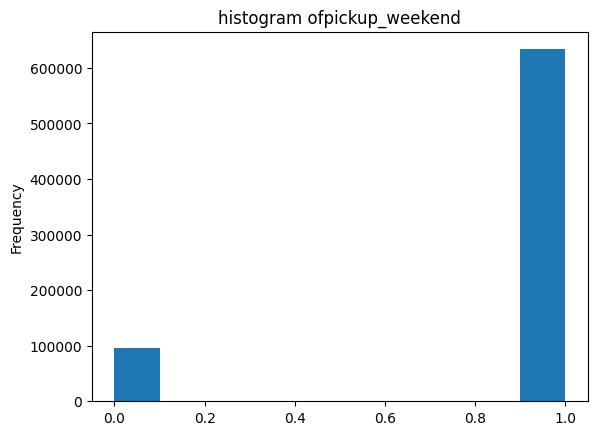

count    729322.000000
mean          0.868360
std           0.338099
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: pickup_weekend, dtype: float64
****************************** pickup_hour
boxplot of  pickup_hour


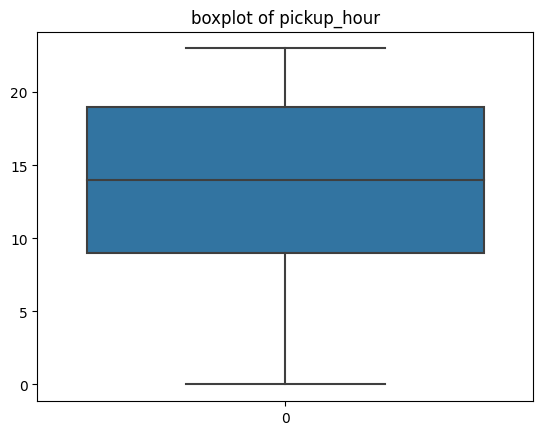

density plot of pickup_hour
****************************** pickup_hour


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


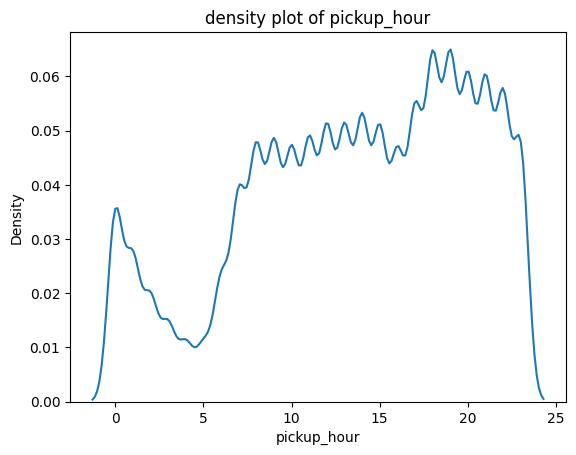

density plot of pickup_hour
****************************** pickup_hour


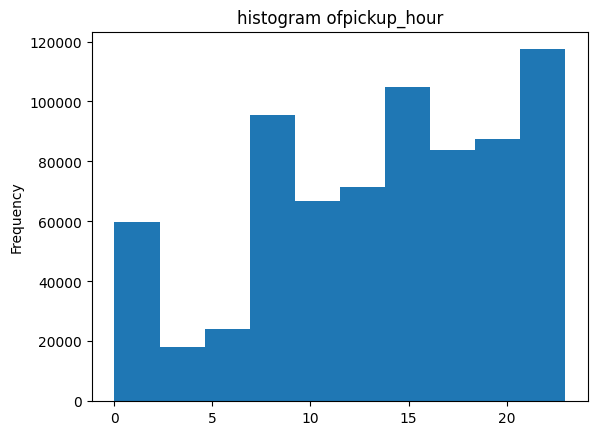

count    729322.000000
mean         13.611698
std           6.402853
min           0.000000
25%           9.000000
50%          14.000000
75%          19.000000
max          23.000000
Name: pickup_hour, dtype: float64
****************************** dropoff_year
boxplot of  dropoff_year


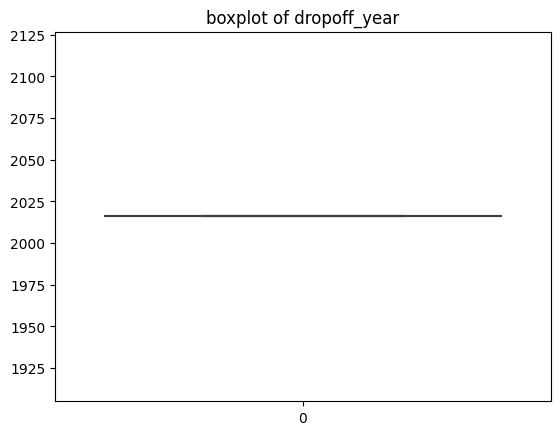

density plot of dropoff_year
****************************** dropoff_year


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_26/1389779063.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[i])


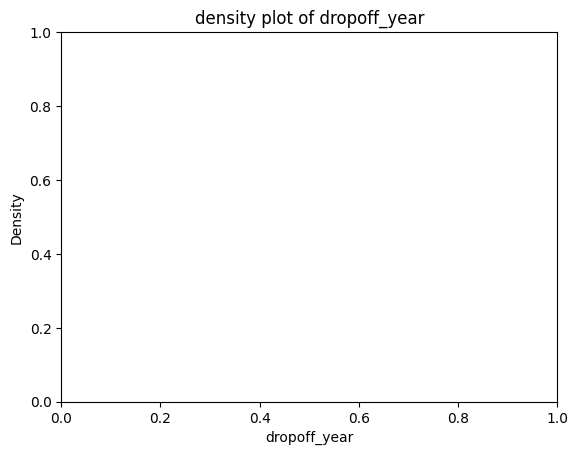

density plot of dropoff_year
****************************** dropoff_year


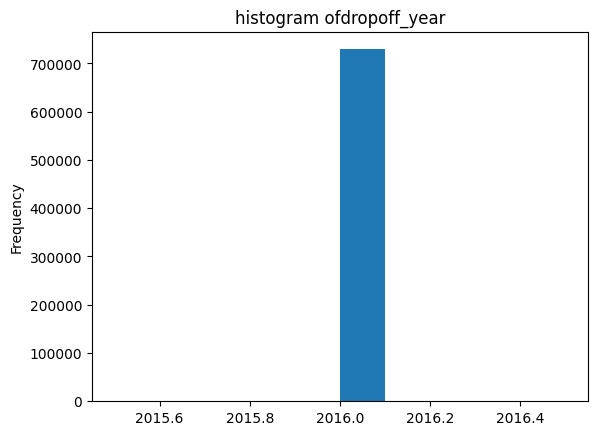

count    729322.0
mean       2016.0
std           0.0
min        2016.0
25%        2016.0
50%        2016.0
75%        2016.0
max        2016.0
Name: dropoff_year, dtype: float64
****************************** dropoff_month
boxplot of  dropoff_month


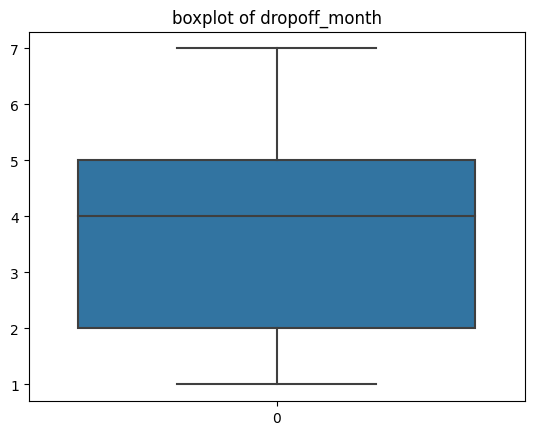

density plot of dropoff_month
****************************** dropoff_month


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


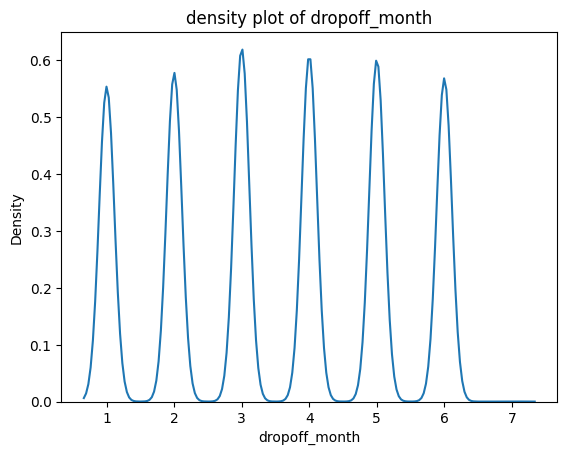

density plot of dropoff_month
****************************** dropoff_month


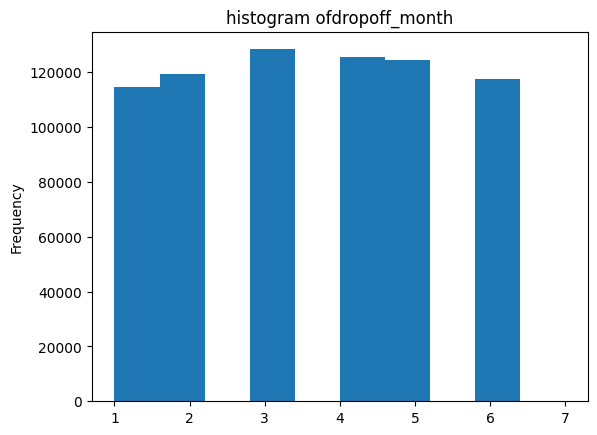

count    729322.000000
mean          3.518764
std           1.680815
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           7.000000
Name: dropoff_month, dtype: float64
****************************** dropoff_day
boxplot of  dropoff_day


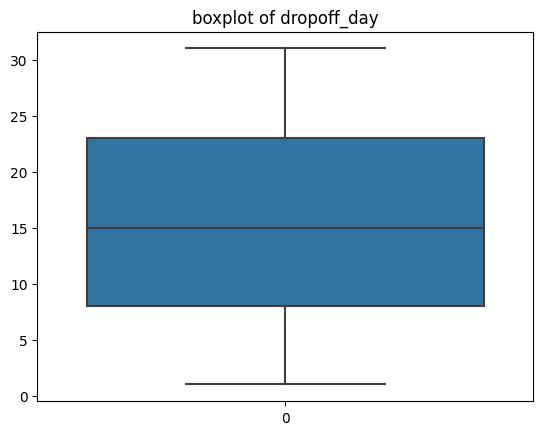

density plot of dropoff_day
****************************** dropoff_day


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


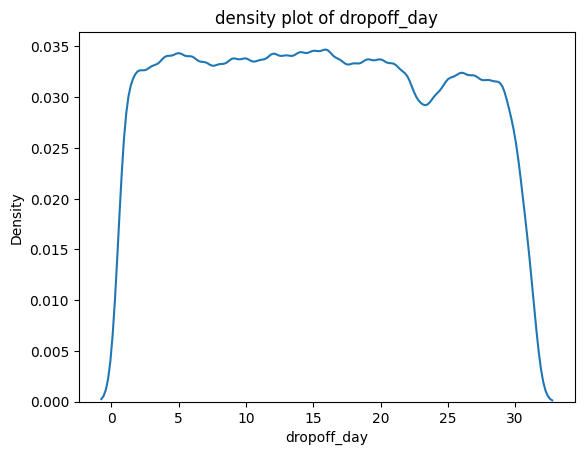

density plot of dropoff_day
****************************** dropoff_day


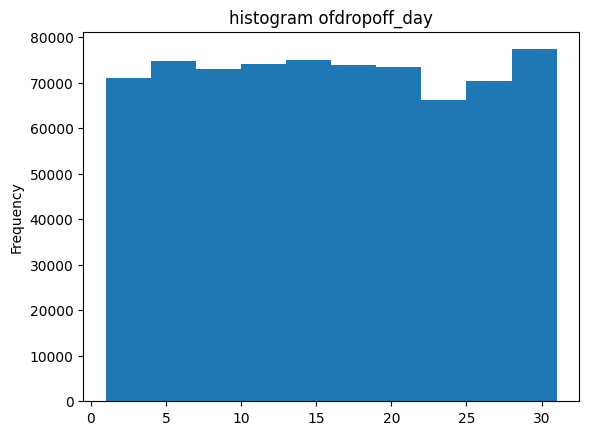

count    729322.000000
mean         15.502587
std           8.699714
min           1.000000
25%           8.000000
50%          15.000000
75%          23.000000
max          31.000000
Name: dropoff_day, dtype: float64
****************************** dropoff_weekday
boxplot of  dropoff_weekday


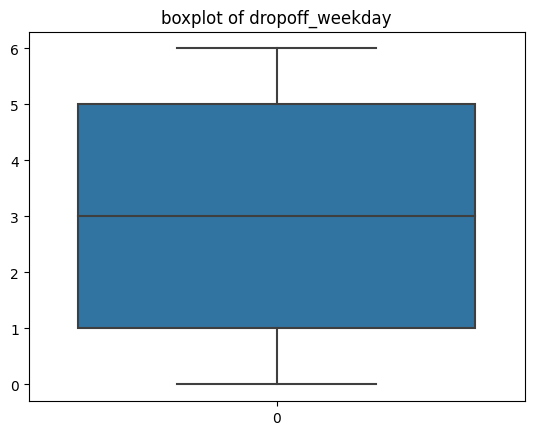

density plot of dropoff_weekday
****************************** dropoff_weekday


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


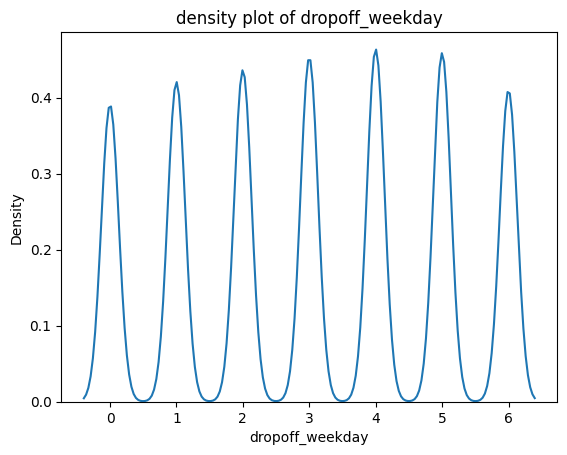

density plot of dropoff_weekday
****************************** dropoff_weekday


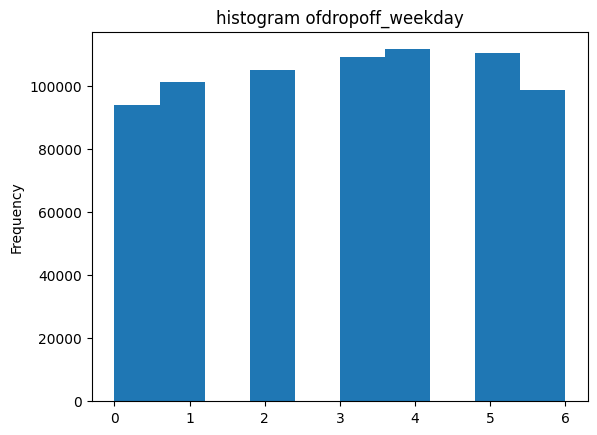

count    729322.000000
mean          3.053015
std           1.956866
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: dropoff_weekday, dtype: float64
****************************** dropoff_weekend
boxplot of  dropoff_weekend


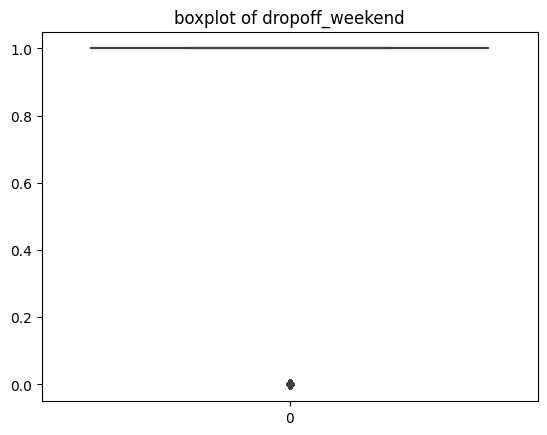

density plot of dropoff_weekend
****************************** dropoff_weekend


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


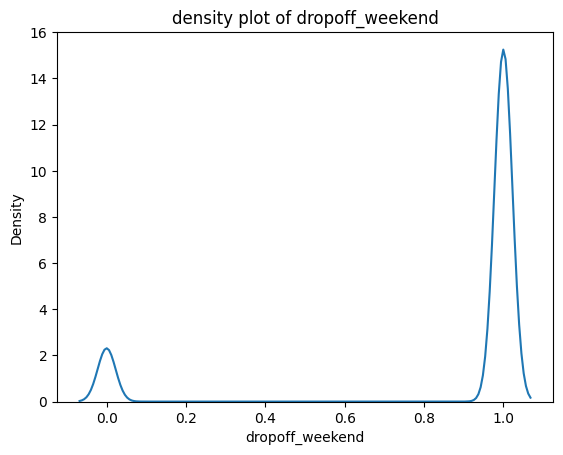

density plot of dropoff_weekend
****************************** dropoff_weekend


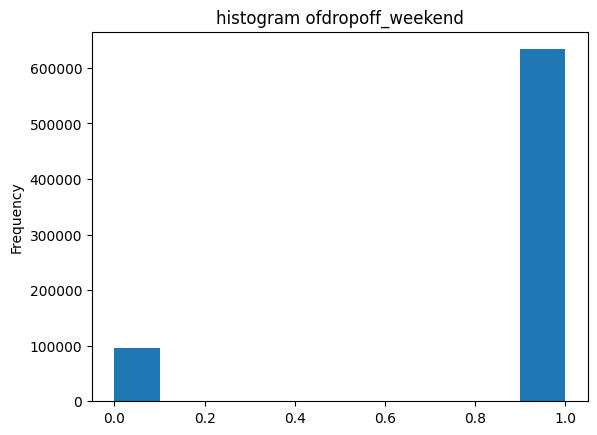

count    729322.000000
mean          0.868453
std           0.337998
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: dropoff_weekend, dtype: float64
****************************** dropoff_hour
boxplot of  dropoff_hour


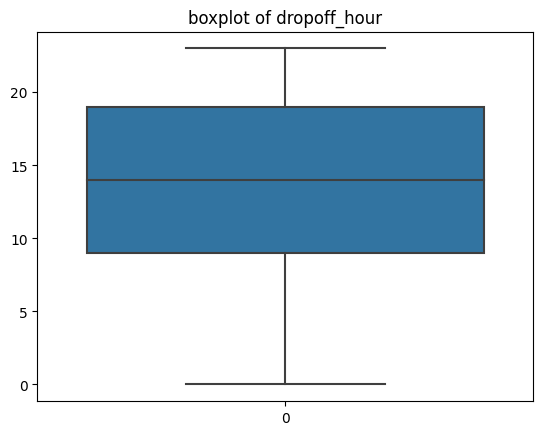

density plot of dropoff_hour
****************************** dropoff_hour


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


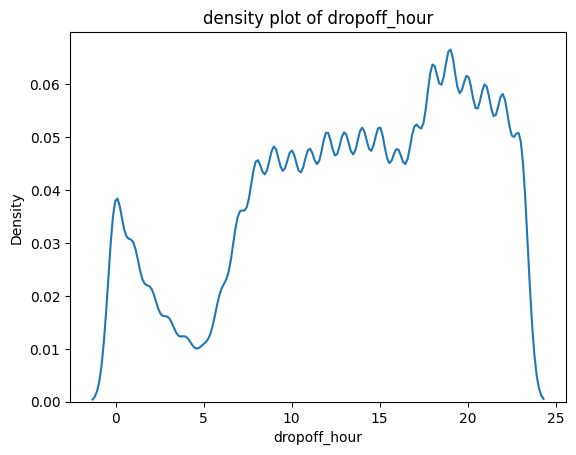

density plot of dropoff_hour
****************************** dropoff_hour


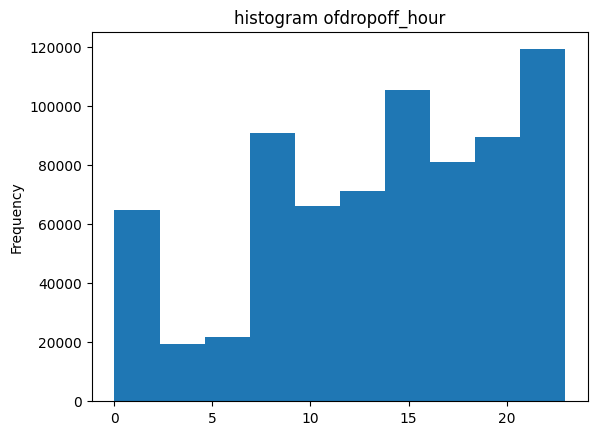

count    729322.00000
mean         13.60616
std           6.48637
min           0.00000
25%           9.00000
50%          14.00000
75%          19.00000
max          23.00000
Name: dropoff_hour, dtype: float64
****************************** drop_hour
boxplot of  drop_hour


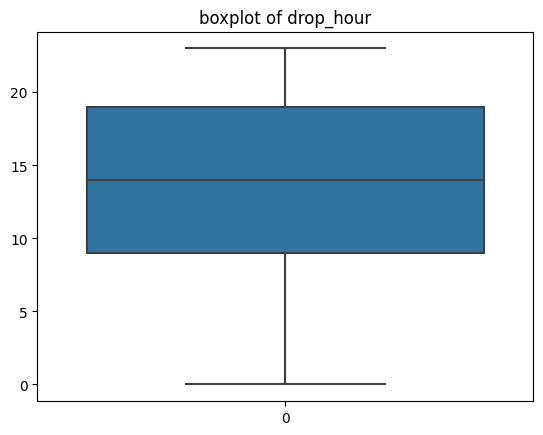

density plot of drop_hour
****************************** drop_hour


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


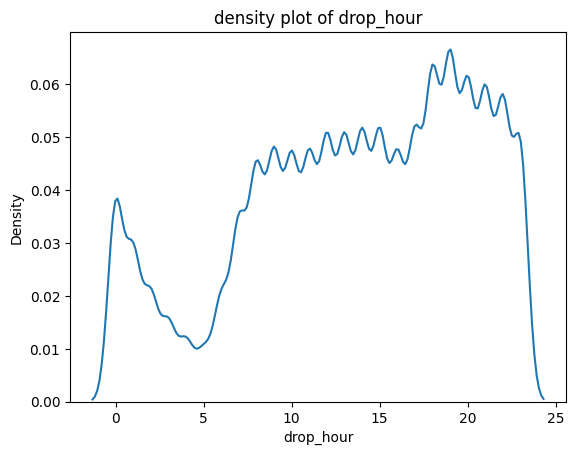

density plot of drop_hour
****************************** drop_hour


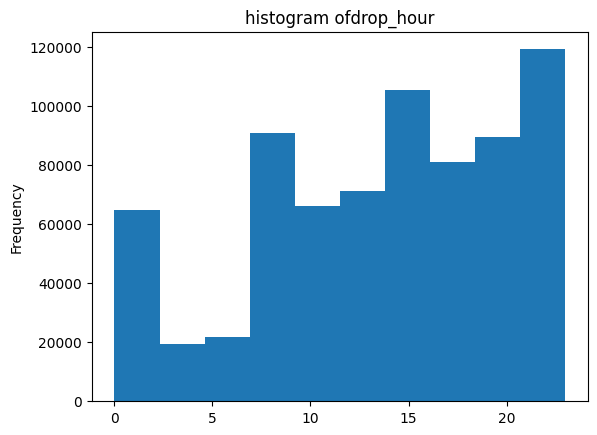

count    729322.00000
mean         13.60616
std           6.48637
min           0.00000
25%           9.00000
50%          14.00000
75%          19.00000
max          23.00000
Name: drop_hour, dtype: float64


In [21]:
uni_variate_visualization(num_col)

In [22]:
new_df["passenger_count"].value_counts(normalize=True)

passenger_count
1    0.709447
2    0.144102
5    0.053373
3    0.040712
6    0.033054
4    0.019264
0    0.000045
7    0.000001
9    0.000001
Name: proportion, dtype: float64

## Mostly 1 and 2 persons are travelling more to compare with others

****************************** passenger_count
boxplot of  passenger_count


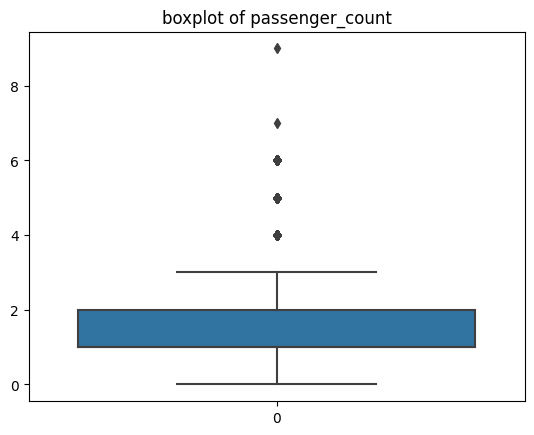

density plot of passenger_count
****************************** passenger_count


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


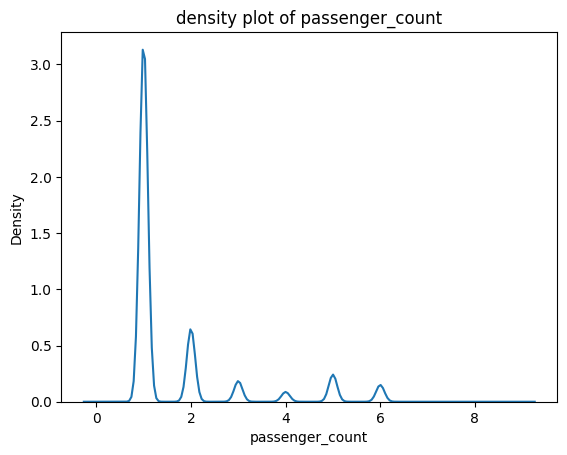

density plot of passenger_count
****************************** passenger_count


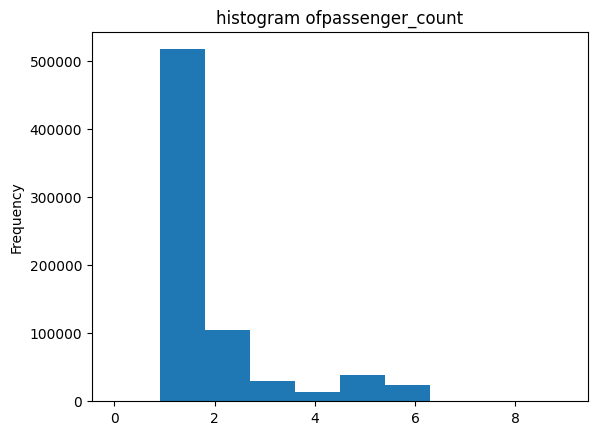

count    729322.000000
mean          1.662055
std           1.312446
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64


In [23]:
uni_variate_visualization(new_df[["passenger_count"]])

# observations :
1. There are mostly singles  and two persons are travelling more
2. pick up year is 2016 and dropoff year is 2016
3. most of pick up held in months of january to june and dropoff months are same to pickup and no outliers 
4. pick up day column uniform distribution from 1 to 30 pick ups and dropoff day are same no outliers
5. pick up hour is looks like continues and no ouliers 24/7 and dropoff hour like silimar to pickup hour
6

# Bivarte analsis


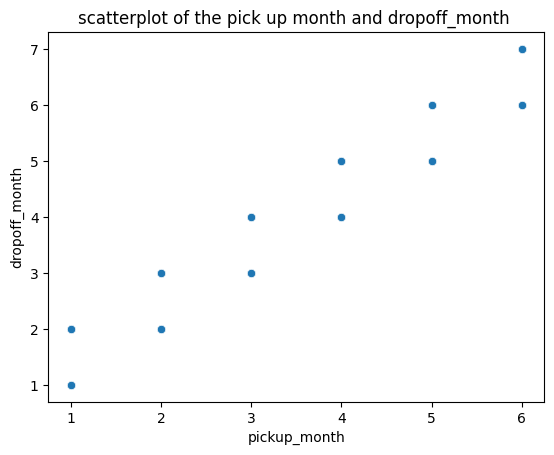

In [24]:
sns.scatterplot(x="pickup_month",y="dropoff_month",data=new_df)
plt.title("scatterplot of the pick up month and dropoff_month ")
plt.show()

## There is   positive correlation between pick up and  dropoff_month 

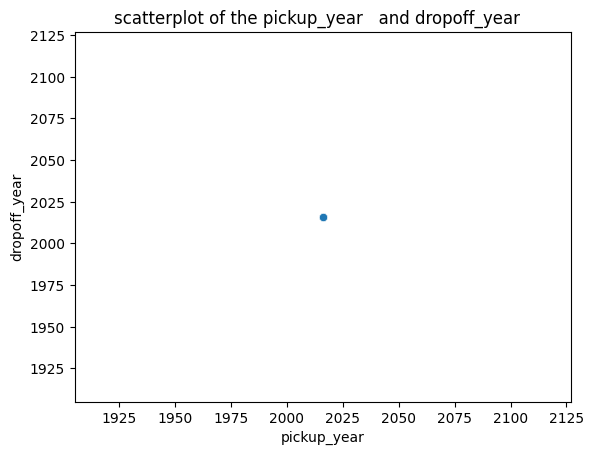

In [25]:
sns.scatterplot(x="pickup_year",y="dropoff_year",data=new_df)
plt.title("scatterplot of the pickup_year   and dropoff_year  ")
plt.show()

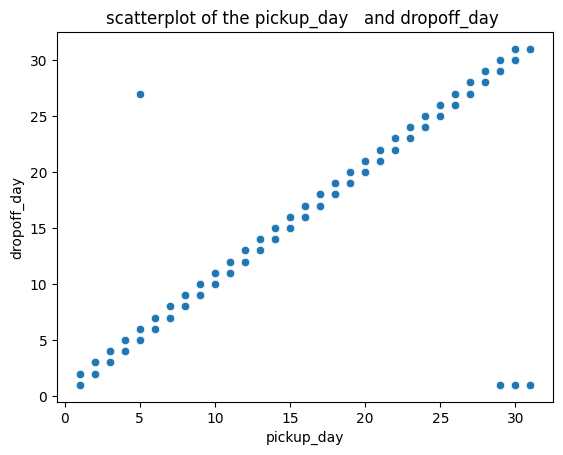

In [26]:
sns.scatterplot(x="pickup_day",y="dropoff_day",data=new_df)
plt.title("scatterplot of the pickup_day   and dropoff_day ")
plt.show()

## There is highly  positive correlation between pickup day and  dropoff_day

## 

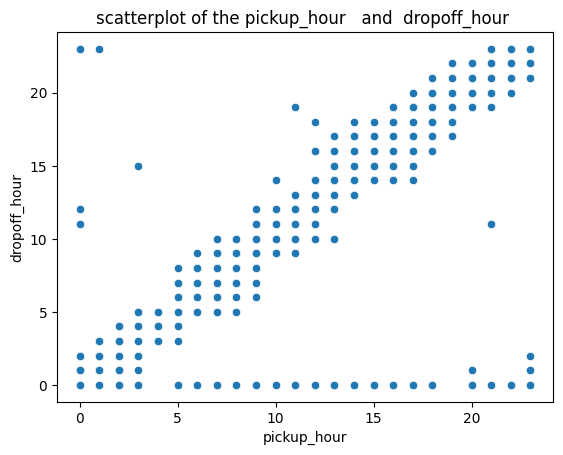

In [27]:
sns.scatterplot(x="pickup_hour",y="dropoff_hour",data=new_df)
plt.title("scatterplot of the pickup_hour   and  dropoff_hour ")
plt.show()

## There is highly  positive correlation between pickup hour and  dropoff hour

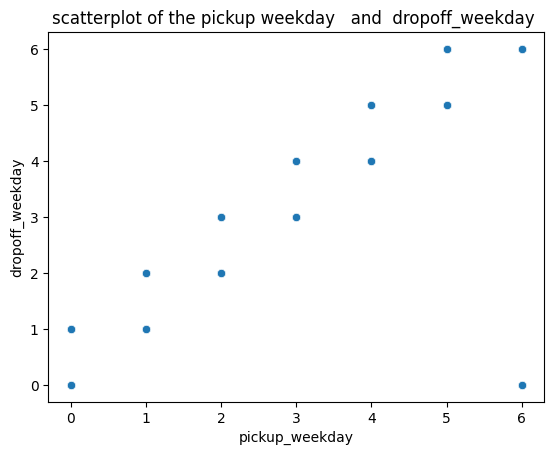

In [28]:
sns.scatterplot(x="pickup_weekday",y="dropoff_weekday",data=new_df)
plt.title("scatterplot of the pickup weekday   and  dropoff_weekday ")
plt.show()

## pickup_weekday and dropoff weekday  positive correlation

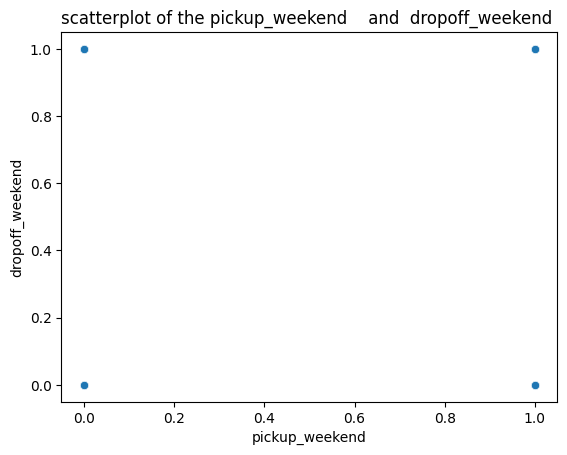

In [29]:
sns.scatterplot(x="pickup_weekend",y="dropoff_weekend",data=new_df)
plt.title("scatterplot of the pickup_weekend    and  dropoff_weekend ")
plt.show()

In [32]:
num_col.corr()

,trip_duration,pickup_year,pickup_month,pickup_day,pickup_weekday,pickup_weekend,pickup_hour,dropoff_year,dropoff_month,dropoff_day,dropoff_weekday,dropoff_weekend,dropoff_hour,drop_hour
trip_duration,1.000000,NaN,0.009378,0.000999,-0.002302,0.000766,0.002979,NaN,0.010135,0.001701,-0.003369,-0.000207,0.003027,0.003027
pickup_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_month,0.009378,NaN,1.000000,-0.014995,-0.013626,-0.017486,-0.003301,NaN,0.999937,-0.015091,-0.013320,-0.017417,-0.004013,-0.004013
pickup_day,0.000999,NaN,-0.014995,1.000000,0.005639,0.580747,-0.001699,NaN,-0.014635,0.997913,0.005467,0.577389,-0.001825,-0.001825
pickup_weekday,-0.002302,NaN,-0.013626,0.005639,1.000000,0.030235,-0.082079,NaN,-0.013604,0.005650,0.993789,0.030195,-0.085767,-0.085767
pickup_weekend,0.000766,NaN,-0.017486,0.580747,0.030235,1.000000,0.000506,NaN,-0.017402,0.580282,0.030027,0.996497,0.000420,0.000420
pickup_hour,0.002979,NaN,-0.003301,-0.001699,-0.082079,0.000506,1.000000,NaN,-0.003043,-0.001560,-0.078777,0.001001,0.934591,0.934591
dropoff_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_month,0.010135,NaN,0.999937,-0.014635,-0.013604,-0.017402,-0.003043,NaN,1.000000,-0.015440,-0.013268,-0.017956,-0.004386,-0.004386
dropoff_day,0.001701,NaN,-0.015091,0.997913,0.005650,0.580282,-0.001560,NaN,-0.015440,1.000000,0.005534,0.580604,-0.002035,-0.002035


# conculsions
1.  pickup_weekday and dropoff weekday  positive correlation
2. There is highly  positive correlation between pickup hour and  dropoff hour
3. There is   positive correlation between pick up month and  dropoff_month
4. There is highly  positive correlation between pickup day and  dropoff_day
